# **Pendidikan (Students Performance in Exams)**
##**Sumber Dataset**

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams



*   **Nama:** Maylina Nur'aini
*   **Email:** maylinanuraini@gmail.com
*   **ID Dicoding:** MC444D5X0679



# **Import Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
import zipfile
import os
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import mean_squared_error

## **Data Loading**

Pada tahap Data Loading ini, file kaggle.json yang berisi kunci API Kaggle diunggah untuk melakukan autentikasi.Kemudian API key disalin ke direktori yang tepat. Dataset bernama students-performance-in-exams diunduh dan diekstrak. Setalah itu, file CSV dibaca menggunakan pandas dan lima baris pertama ditampilkan dengn ```df.head()``` untuk melihat gambaran awalnya data sebelum melanjutkan ke proses analisis lebih lanjut.**bold text**

In [2]:
# Upload fie json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maylina","key":"e9ca0dbfe70dd2a9da24aa79c607f1b9"}'}

In [3]:
# Setup Api key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Download dataset dari Kaggle
!kaggle datasets download -d spscientist/students-performance-in-exams

# Unzip file dataset
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 38.8MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [4]:
# Membaca file csv
df = pd.read_csv("StudentsPerformance.csv")

# Menampilkan 5 baris pertama
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Data Understanding**

Pada tahap Data Understanding ini,meliputi pengecekan informasi umum menggunakan `df.info()`, statistik deskriptif dengan `df.describe()`, dan melihat ukuran data lewat `df.shape`. sementara `df.isna().sum()` dan `df.duplicated().sum()` digunakan untuk mendeteksi missing values dan data duplikat. Untuk mengenali outlier, dibuat boxplot pada kolom numerik yang menunjukkan data ekstrem di luar rentang interkuartil. Semua langkah ini penting untuk menilai kualitas data sebelum analisis lebih lanjut.

In [5]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Insight:**
* Terdapat 5 kolom dengan tipe `object`, yaitu `gender`, `race/ethnicity`, `parental level of education`, `lunch`, dan `test preparation course`.
* Terdapat 3 kolom numerik dengan tipe `int64`, yaitu `math score`, `reading score` dan `writing score`.
* Terdapat fitur numerik `math score` sebagai fitur target, yang merepresentasikan nilai matematika siswa.



In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Menampilkan jumlah baris dan kolom dalam bentuk tuple
df.shape

(1000, 8)

**Insight:**

* Dataset ini memiliki 1.000 data dan memiliki 8 kolom. Kolom Kategori 5 dan kolom numerik 3 (1 sebagai kolom target).

In [7]:
# Menampilkan jumlah nilai unik di setiap kolomnya
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [8]:
# Menampilkan missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Insight:**

* Semua kolom memiliki jumlah nilai unik yang berbeda, mengindikasikan keragaman data pada setiap fitur. Hal ini terlihat dari hasil `df.nunique()`.
* Tidak ada nilai yang hilang (missing values) dalam dataset, seperti yang ditunjukkan oleh `df.isna().sum()` yang menghasilkan 0 untuk semua kolom.

In [9]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
* Tidak terdapat data duplikat dalam dataset.

Pengecekan outlier akan dilakukan pada fitur numerik yang relevan. Karena `math score` adalah fitur target yang akan diprediksi, fitur ini akan dikecualikan dari proses pengecekan outlier, sementara fitur numerik lainnya akan dianalisis.

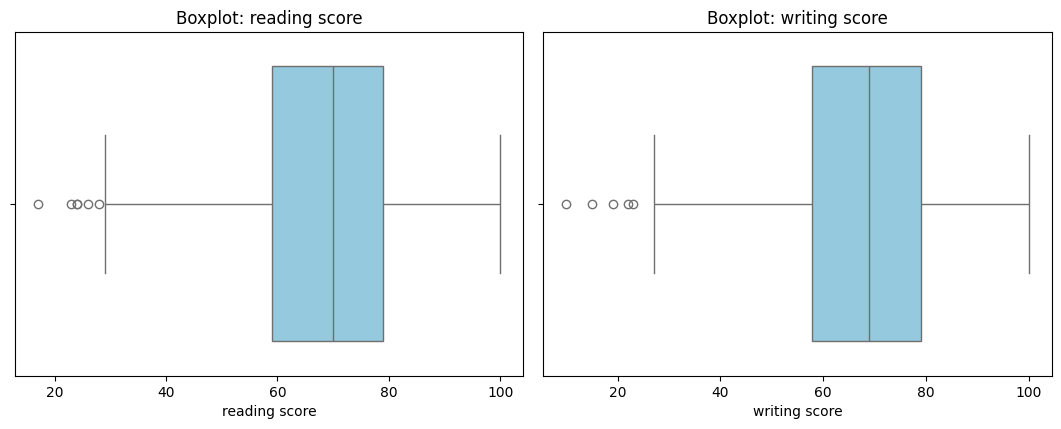

In [10]:
# cek data numerik yang memiliki outlier dengan boxplot
# Daftar fitur numerik yang relevan untuk pengecekan outlier
fitur_numerik = [
    'reading score',
    'writing score'
]

# Plot boxplot untuk masing-masing fitur numerik
plt.figure(figsize=(16, 12))
for i, col in enumerate(fitur_numerik):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

**Insight:**

Setiap fitur numerik dalam dataset mengandung outlier yang dapat memengaruhi akurasi hasil prediksi maupun performa model. Oleh karena itu, deteksi dan penanganan outlier akan dilakukan secara khusus pada tahap Data Preparation guna meningkatkan kualitas data yang digunakan dalam pemodelan

# **Exploratory Data Analysis (EDA)**

## **EDA - Univariate Analysis**

Pada tahap ini Univariate Analysis, dilakukan analisis distribusi fitur kategorikal (`gender`, `race/ethnicity`, `parental level of education`, `lunch`, `test preparation course`) dengan hitung jumlah dan presentase kategori, dan juga divisualisasikan dengan diagram batang. Untuk fitur numerik (`math score`, `reading score`, dan `writing score`) distribusi data divisualisasikan dengan histrogram.

In [11]:
# Membagi fitur Numerik dan Kategori
fitur_kategori = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
fitur_numerik = ['math score', 'reading score', 'writing score']

### **Fitur Kategorikal**

        jumlah sampel  persentase
gender                           
female            518        51.8
male              482        48.2


<Axes: title={'center': 'gender'}, xlabel='gender'>

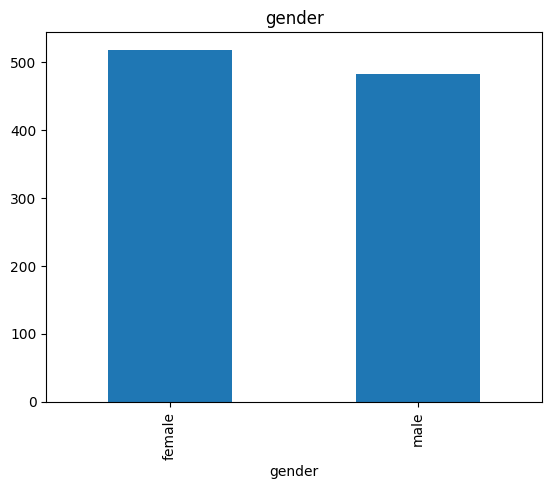

In [12]:
# Fitur gender
feature = fitur_kategori[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight:**

* Berdasarkan analisis, distribusi fitur gender menunjukkan female (51,8%) dan male (48,2%), dengan female menjadi kategori yang lebih dominan dibandingkan dengan male.

                jumlah sampel  persentase
race/ethnicity                           
group C                   319        31.9
group D                   262        26.2
group B                   190        19.0
group E                   140        14.0
group A                    89         8.9


<Axes: title={'center': 'race/ethnicity'}, xlabel='race/ethnicity'>

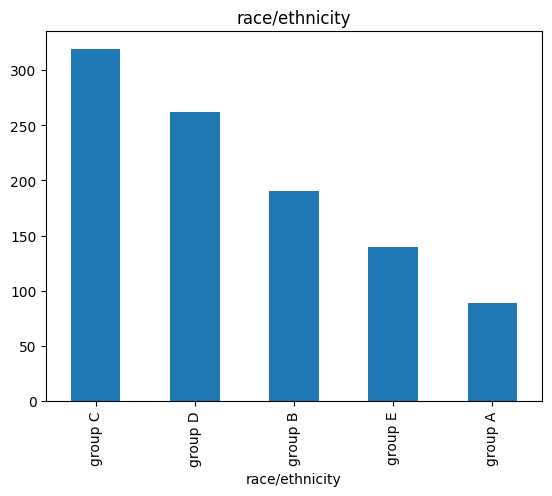

In [13]:
# Fitur race/ethnicity
feature = fitur_kategori[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight:**

* Fitur race/ethnicity menunjukkan bahwa grup yang paling banyak adalah `grup C`, diikuti oleh `grup D`, `grup B`, `grub E`, hingga paling sedikit adalah `grup A`.

                             jumlah sampel  persentase
parental level of education                           
some college                           226        22.6
associate's degree                     222        22.2
high school                            196        19.6
some high school                       179        17.9
bachelor's degree                      118        11.8
master's degree                         59         5.9


<Axes: title={'center': 'parental level of education'}, xlabel='parental level of education'>

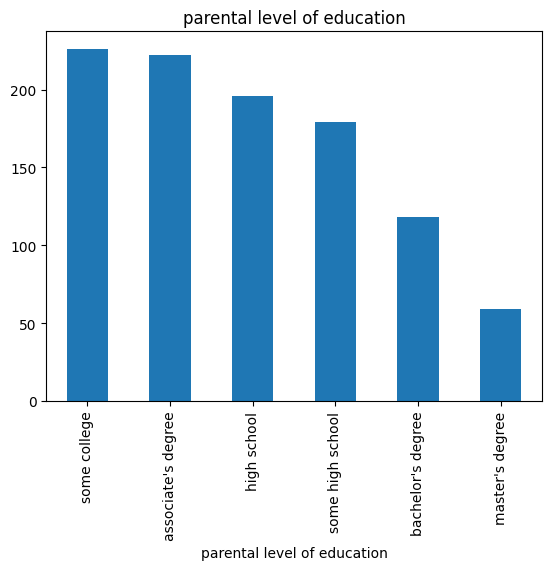

In [14]:
# Fitur parental level of education
feature = fitur_kategori[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight:**

* Fitur parental level of education menunjukkan bahwa tingkat pendidikan orang tua yang paling umum adalah `some college`, diikuti oleh `associate's degree`, dan seterusnya.

              jumlah sampel  persentase
lunch                                  
standard                645        64.5
free/reduced            355        35.5


<Axes: title={'center': 'lunch'}, xlabel='lunch'>

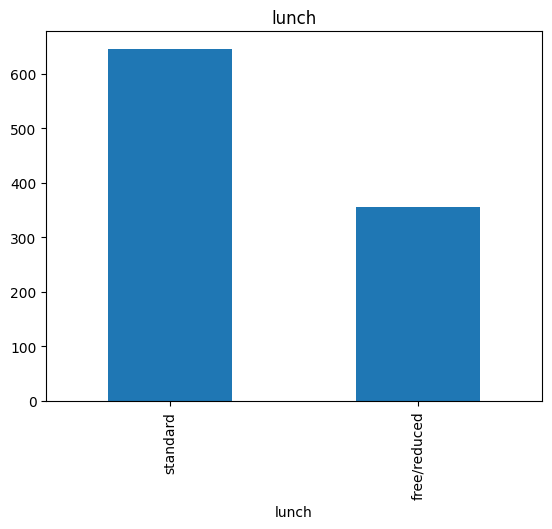

In [15]:
# Fitur lunch
feature = fitur_kategori[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight:**

* Fitur lunch menunjukkan bahwa kategori standard memiliki jumlah sampel/persentase yang lebih tinggi dibandingkan dengan free/reduced, yang berarti mayoritas siswa memiliki tipe makan siang kategori standard.

                         jumlah sampel  persentase
test preparation course                           
none                               642        64.2
completed                          358        35.8


<Axes: title={'center': 'test preparation course'}, xlabel='test preparation course'>

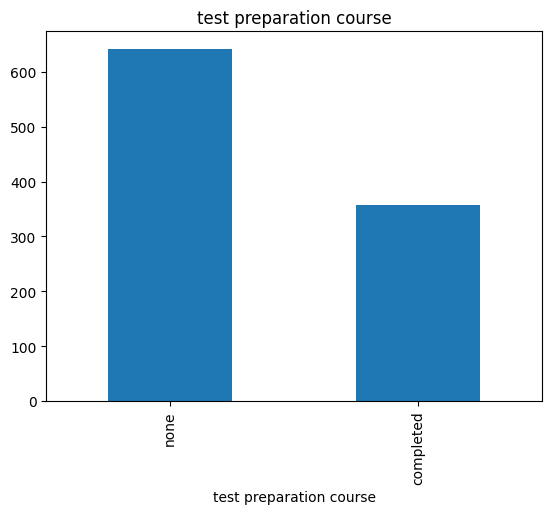

In [16]:
# Fitur test preparation course
feature = fitur_kategori[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight:**

* Fitur test preparation course menunjukkan bahwa kategori none memiliki jumlah sampel/persentase paling tinggi dibandingkan dengan completed. Ini berarti mayoritas siswa tidak mengikuti kursus persiapan ujian.

### **Fitur Numerik**

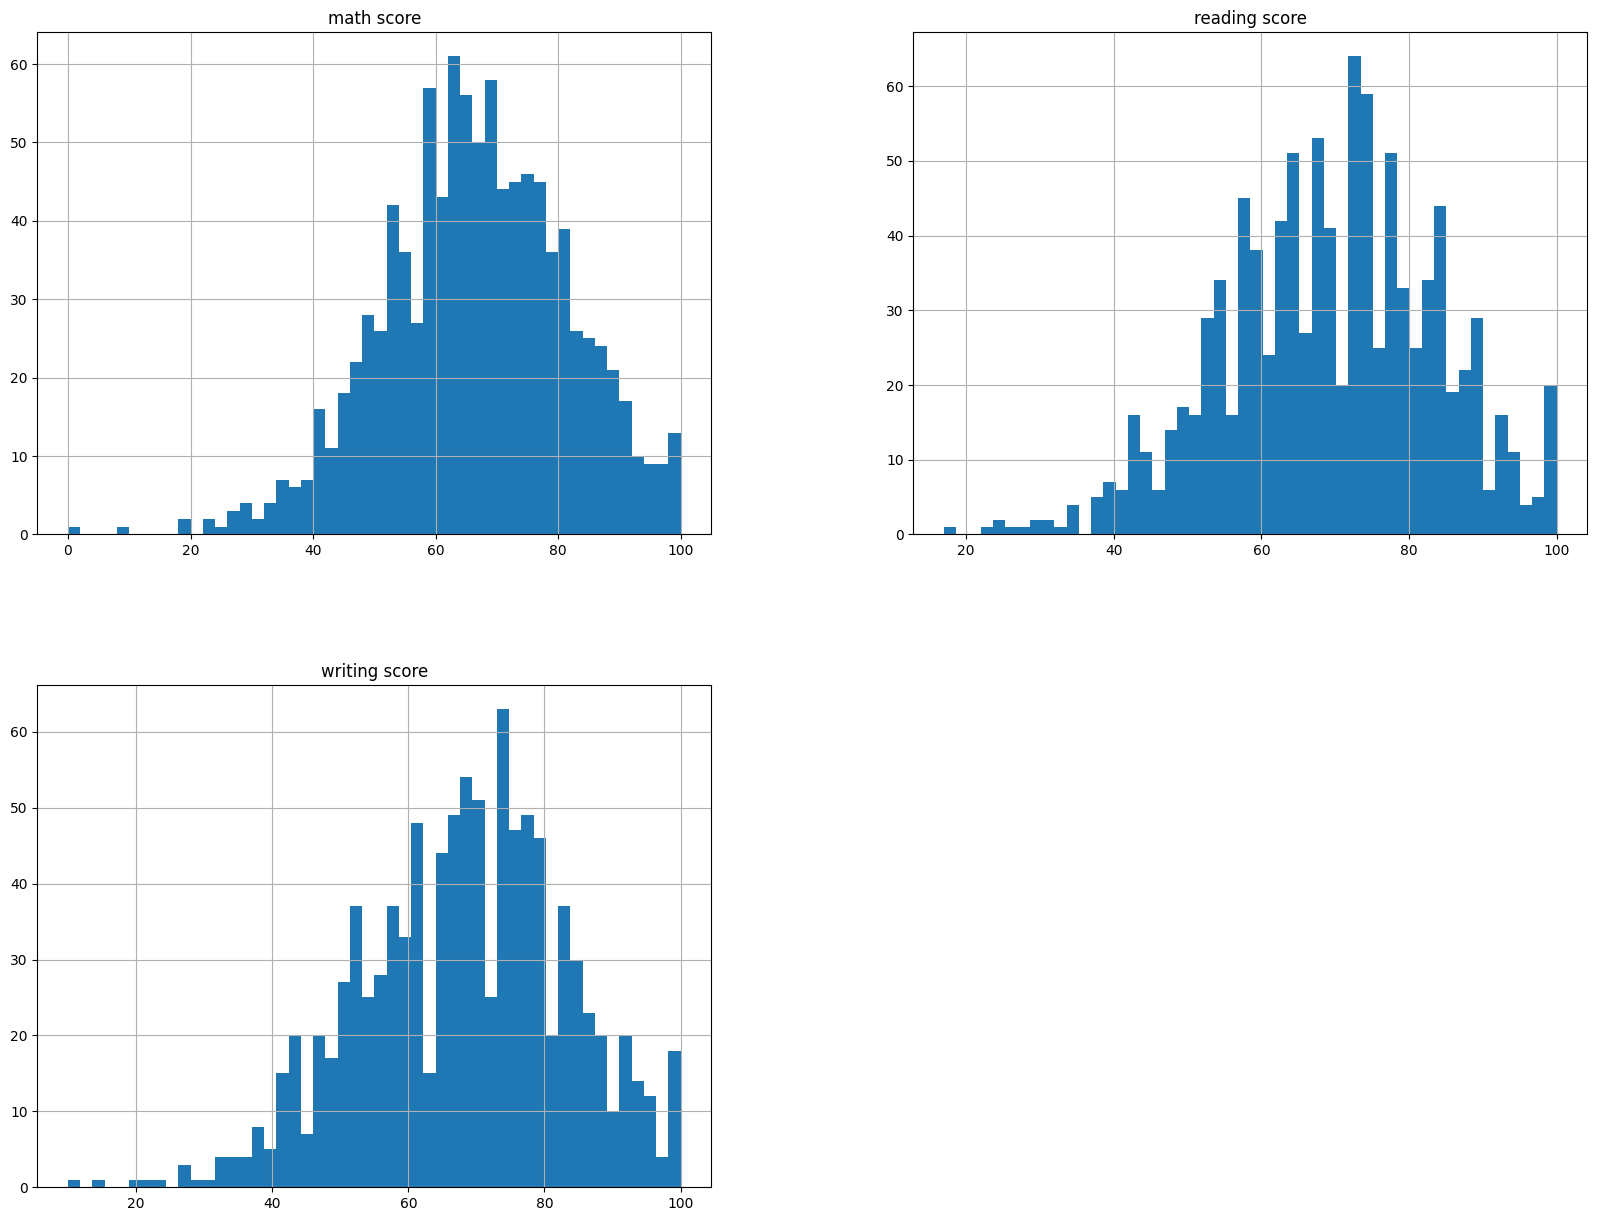

In [17]:
# Melihat distribusi histogram fitur numerik
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:**
* Math score: Distribusi cenderung normal, puncaknya di sekitar nilai tengah. Ada beberapa siswa dengan skor rendah.
* Reading score: Distribusi juga cenderung normal, dengan puncak di sekitar nilai tengah. Terlihat lebih sedikit siswa dengan skor sangat rendah dibandingkan math score.
* Writing score: Distribusi mirip dengan reading score, cenderung normal dengan puncak di sekitar nilai tengah.

## **EDA - Multivariate Analysis**

Pada tahap Multivariate Analysis, dilakukan analisis untuk memahami hubungan antar fitur dalam dataset, khususnya terhadap kolom target yaitu math score. Analisis ini penting untuk mengidentifikasi fitur-fitur yang memiliki pengaruh signifikan terhadap skor matematika siswa.

Untuk fitur kategorikal seperti gender, race/ethnicity, parental level of education, lunch, dan test preparation course, digunakan diagram batang (bar plot) untuk menunjukkan distribusi nilai rata-rata math score pada masing-masing kategori. Visualisasi ini bertujuan untuk melihat apakah terdapat perbedaan signifikan skor matematika berdasarkan kelompok kategori tertentu.

Sementara itu, untuk fitur numerik seperti reading score dan writing score, hubungan antar fitur dianalisis menggunakan pairplot, yang memperlihatkan scatter plot serta distribusi antar pasangan fitur. Visualisasi ini membantu dalam mendeteksi pola linier atau hubungan korelatif antara skor matematika dan dua skor lainnya.

Selain itu, digunakan juga heatmap korelasi untuk menunjukkan tingkat hubungan (korelasi) antar fitur numerik dalam bentuk matriks warna. Heatmap ini memberikan gambaran seberapa kuat fitur reading score dan writing score berkorelasi dengan math score, serta hubungan antar sesama fitur numerik lainnya.

### **Categorical Features**

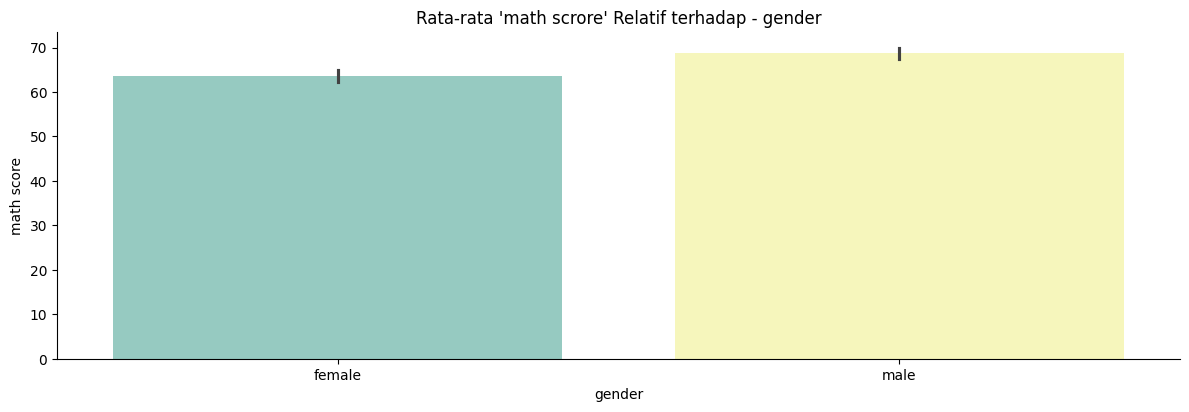

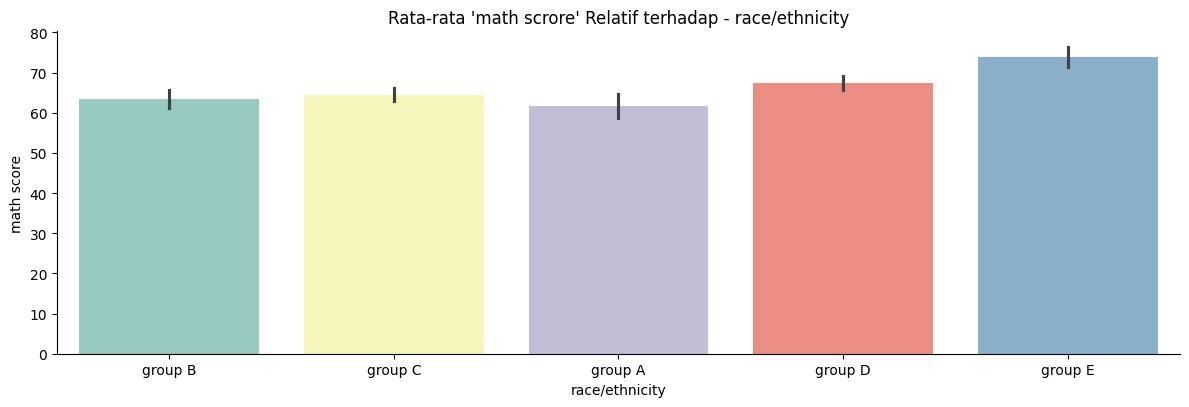

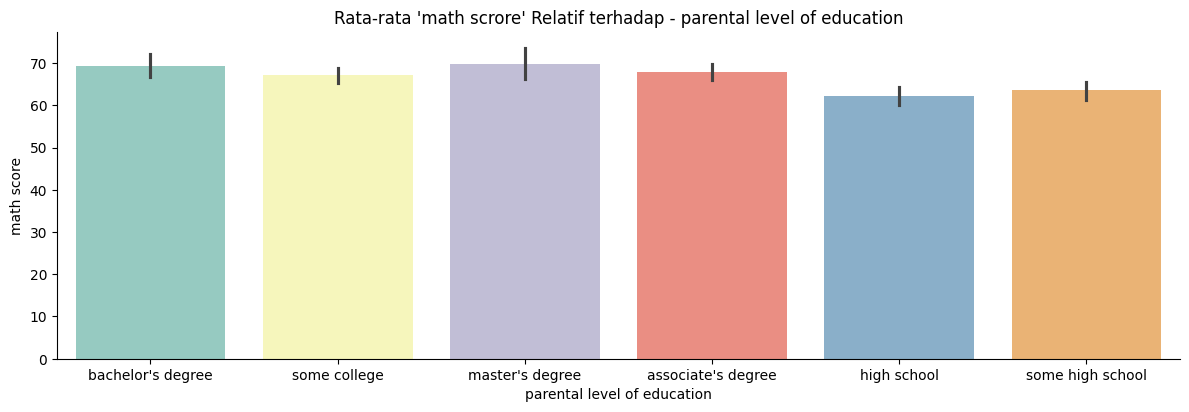

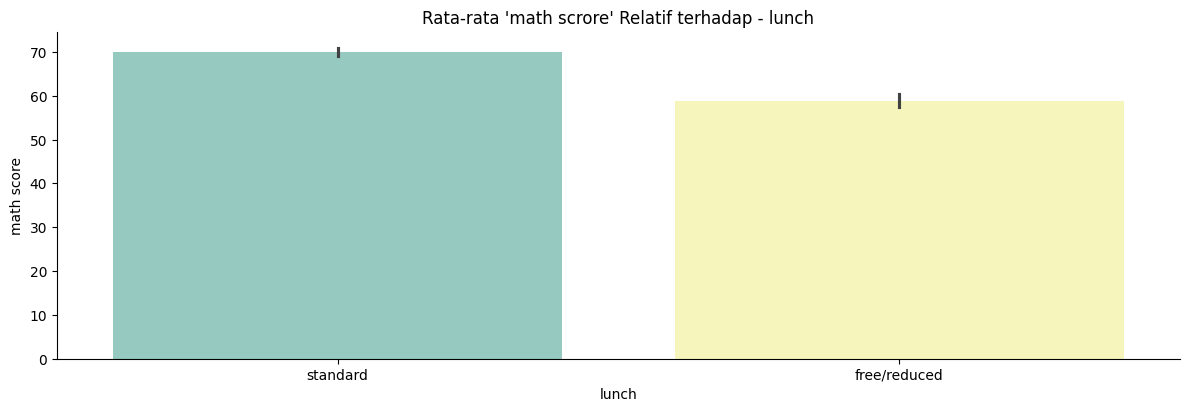

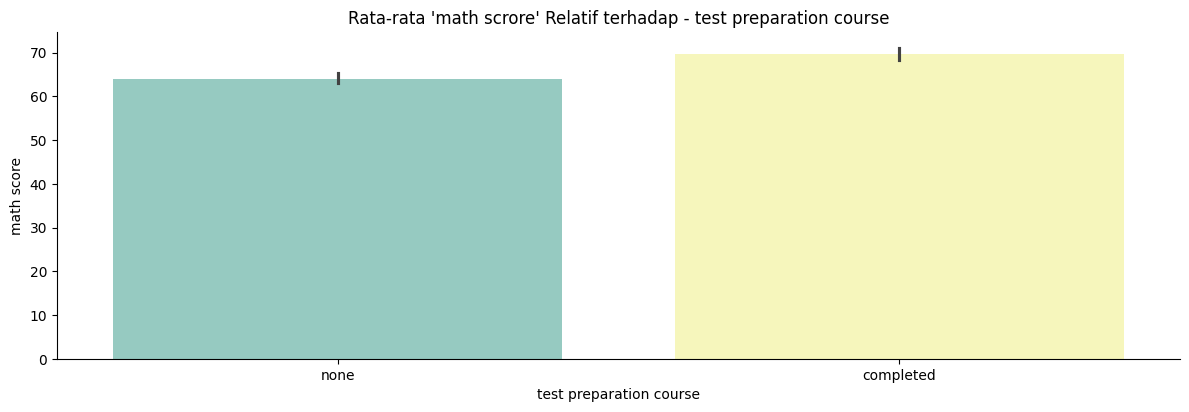

In [18]:
# Menentukan fitur kategorikal
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Loop untuk membuat plot untuk setiap kolom kategori
for col in categorical_features:
    sns.catplot(x=col, y='math score', kind="bar", dodge=False, height=4, aspect=3, data=df, hue=col, palette="Set3", legend=False)
    plt.title("Rata-rata 'math scrore' Relatif terhadap - {}".format(col))
    plt.show()

**Insight:**
* Pada fitur gender, terlihat bahwa siswa perempuan (female) cenderung memiliki rata-rata (math score) yang sedikit lebih rendah dibandingkan siswa laki-laki (male).
* Pada fitur race/ethnicity, rata-rata (math score) bervariasi antar grup. Grup (E) cenderung memiliki rata-rata (math score) tertinggi, sementara Grup (A) memiliki rata-rata (math score) terendah.
* Untuk parental level of education, siswa yang orang tuanya memiliki tingkat pendidikan lebih tinggi ("master's degree" dan "bachelor's degree") cenderung memiliki rata-rata 'math score' yang lebih tinggi dibandingkan siswa yang orang tuanya memiliki tingkat pendidikan lebih rendah ("high school" dan "some high school").
* Pada fitur lunch, siswa yang memiliki tipe makan siang 'standard' cenderung memiliki rata-rata 'math score' yang lebih tinggi dibandingkan siswa yang memiliki tipe makan siang 'free/reduced'.
* Fitur test preparation course menunjukkan bahwa siswa yang telah menyelesaikan kursus persiapan ujian ('completed') cenderung memiliki rata-rata 'math score' yang lebih tinggi dibandingkan siswa yang tidak mengikuti kursus ('none').

###**Numerical Features**

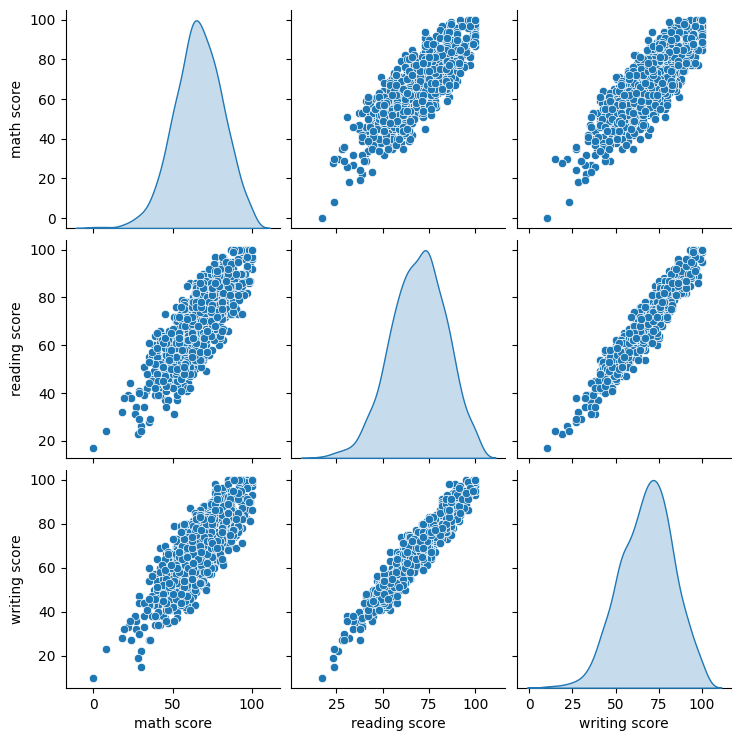

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')
plt.show()

**Insight:**

Berdasarkan visualisasi pairplot, terlihat adanya korelasi positif yang kuat antar fitur numerik yaitu math score, reading score, dan writing score. Hal ini ditunjukkan oleh pola sebaran data pada scatter plot yang membentuk pola linier naik, menandakan bahwa siswa dengan nilai tinggi pada satu mata pelajaran cenderung juga memiliki nilai tinggi pada mata pelajaran lainnya.

Sebaliknya, tidak ditemukan korelasi negatif yang signifikan antar fitur numerik dalam dataset ini. Hubungan antar fitur cenderung searah dan saling memperkuat, yang menunjukkan bahwa ketiga skor ini berkaitan erat dalam menggambarkan performa akademik siswa secara keseluruhan.

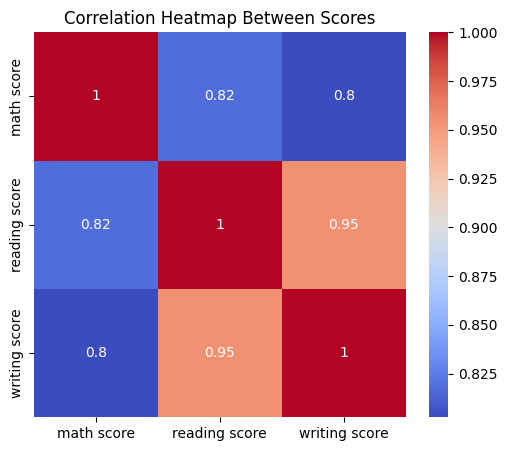

In [20]:
# Daftar fitur numerik
num_cols = ['math score', 'reading score', 'writing score']

# Heatmap korelasi numerik
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Scores')
plt.show()

**Insight:**

* Reading score dan writing score memiliki korelasi tertinggi dengan nilai 0.95, yang menunjukkan hubungan yang hampir sempurna. Artinya, siswa yang memiliki nilai tinggi dalam membaca hampir selalu memiliki nilai tinggi dalam menulis.

* Math score juga menunjukkan korelasi yang kuat dengan reading score (0.82) dan writing score (0.80). Ini menunjukkan bahwa kemampuan matematika siswa juga berkaitan dengan kemampuan membaca dan menulis, meskipun tidak sekuat hubungan antara membaca dan menulis.

# **Data Preparation**

Hasil EDA menunjukkan perlunya beberapa langkah pembersihan dan persiapan data. Oleh karena itu, pada tahap Data Preparation, akan memastikan data dalam kondisi optimal untuk proses pemodelan dan evaluasi.

##**Menangani Outliers**

In [21]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates()

# Menampilkan data setelah duplikat dihapus
print("Jumlah duplikasi setelah dihapus: ", df_cleaned.duplicated().sum())

Jumlah duplikasi setelah dihapus:  0


**Insight:**

Tidak ada data duplikat yang tersisa dalam dataset setelah proses pembersihan.

Jumlah outlier pada kolom reading score: 6
Jumlah outlier pada kolom writing score: 0


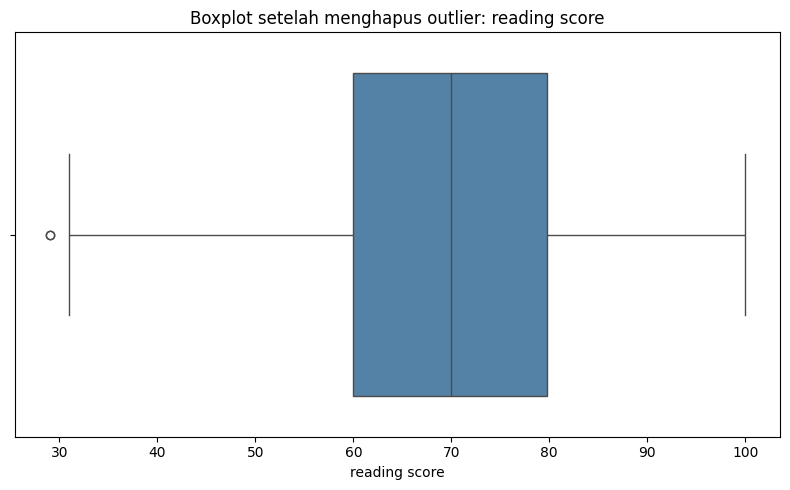

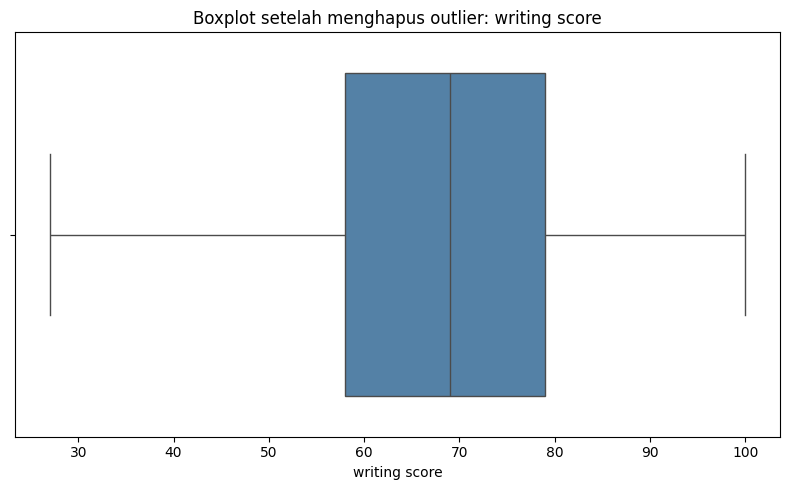

In [22]:
# Daftar kolom yang ingin ditangani outlier-nya
fitur_outlier = ['reading score', 'writing score']

# Tangani outlier dengan metode IQR
for col in fitur_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Tampilkan jumlah outlier sebelum dihapus
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier pada kolom {col}: {outliers.shape[0]}")

    # Hapus outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Visualisasi boxplot setelah outlier dihapus
for col in fitur_outlier:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(f'Boxplot setelah menghapus outlier: {col}')
    plt.tight_layout()
    plt.show()

**Insight:**

Fitur `math score` merupakan fitur numerik dan fitur target, sehingga fitur tersebut tidak perlu ditangani dalam hal outlier.

## **Encoding Fitur Kategorikal**

In [23]:
# Fitur kategorikal yang akan di-encode
fitur_kategori = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Melakukan One-Hot Encoding pada fitur kategorikal
df = pd.get_dummies(df, columns=fitur_kategori, drop_first=True, dtype=int)

# Menampilkan 5 baris pertama setelah encoding
print("DataFrame setelah One-Hot Encoding:")
display(df.head())

DataFrame setelah One-Hot Encoding:


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


**Insight:**

Data kategorikal kini direpresentasikan dalam format numerik yang dapat diproses oleh model machine learning, dan kolom asli telah digantikan oleh kolom-kolom hasil encoding.

### **Train-Test-Split**

In [24]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('math score', axis=1)
y = df['math score']

# Split data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tampilkan ukuran hasil split
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (795, 14)
Ukuran data testing: (199, 14)


**Insight:**

Pembagian data dilakukan dengan train-test split dengan porsi pembagian 80% untuk data latih (training) dan 20% untuk data uji (testing)

### **Standarisasi**

In [25]:
# Menentukan fitur numerik
numerical_features = ['reading score', 'writing score']

# Normalisasi data numerik
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
scaler.fit(X_test[numerical_features])
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Cek hasil
print("Fitur numerik setelah distandarisasi (X_train):")
print(X_train[numerical_features].describe().round(4))

print("Fitur numerik setelah distandarisasi (X_test):")
print(X_test[numerical_features].describe().round(4))

Fitur numerik setelah distandarisasi (X_train):
       reading score  writing score
count       795.0000       795.0000
mean         -0.0000        -0.0000
std           1.0006         1.0006
min          -2.8750        -2.8217
25%          -0.6945        -0.7262
50%           0.0792         0.0173
75%           0.7122         0.6933
max           2.1190         2.1128
Fitur numerik setelah distandarisasi (X_test):
       reading score  writing score
count       199.0000       199.0000
mean         -0.1513        -0.1335
std           0.9867         0.9792
min          -2.7344        -2.8217
25%          -0.8352        -0.8614
50%          -0.2022        -0.0503
75%           0.5716         0.5581
max           2.1190         2.0452


**Insight:**

Hasil describe() setelah standarisasi menunjukkan bahwa rata-rata (mean) mendekati 0 dan standar deviasi (std) mendekati 1 untuk fitur-fitur numerik di both X_train and X_test, mengkonfirmasi bahwa standarisasi berhasil diterapkan.

# **Model Development**

### **K-Nearest Neighbor**

Model KNN dibangun dengan menggunakan KNeighborsRegressor dengan jumlah tetangga (neighbors) sebesar 5. Model ini dilatih menggunakan data pelatihan (x_train dan y_train).

In [28]:
# Modelling K-Nearest Neighbor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

### **Random Forest**

Model Random Forest dibangun menggunakan RandomForestRegressor dengan 100 estimator dan pengaturan random_state sebesar 42 untuk memastikan hasil yang konsisten. Model ini dilatih menggunakan data pelatihan (X_train dan y_train).

In [29]:
# Modelling Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### **Boosting**

Model Boosting dibangun menggunakan AdaBoostRegressor dengan learning rate sebesar 0.05 dan random_state yang sama.

In [30]:
# Membuat model boosting
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

# **Evaluasi Model**

Pada evaluasi model, data uji ditransformasi menggunakan scaler, lalu dihitung Mean Squared Error (MSE) untuk model KNN, Random Forest, dan Boosting. Hasil MSE dibandingkan dan divisualisasikan dalam diagram batang untuk menilai performa setiap model..

In [31]:
# Menggunakan scaler yang sudah dilatih untuk mentransformasi x_test
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Menampilkan beberapa baris pertama dari data x_test setelah transformasi
X_test[numerical_features].head()

,reading score,writing score
924,-4.914250,-4.645589
529,-4.894460,-4.641019
571,-4.785614,-4.540497
661,-4.934040,-4.673004
931,-4.978568,-4.677573


Mean Squared Error (MSE) untuk setiap model:


,train,test
KNN,35.639899,1165.454472
RF,5.2953,1193.505172
Boosting,44.512746,681.897012



Nilai MSE Random Forest (Test): 1193.5052
Nilai MSE Boosting (Test): 681.897
Nilai MSE KNN (Test): 1165.4545


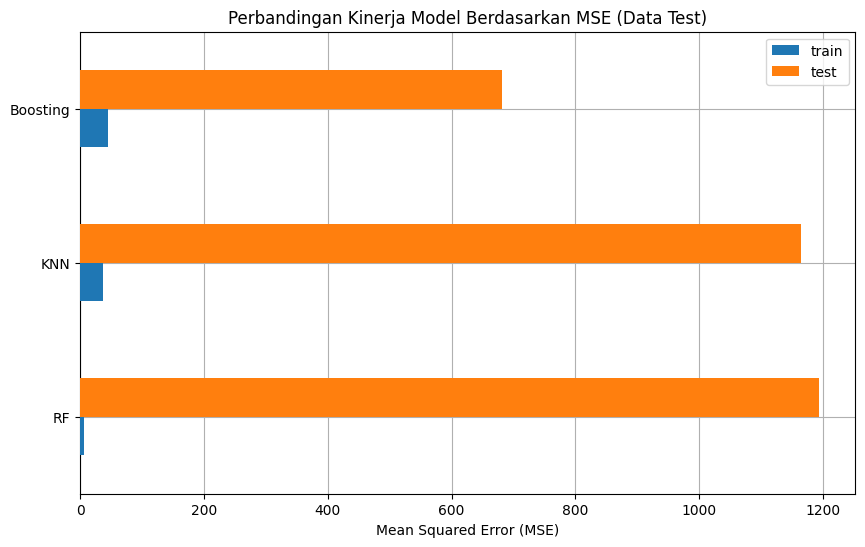

In [47]:
# Membuat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Menampilkan DataFrame MSE
print("Mean Squared Error (MSE) untuk setiap model:")
display(mse)

# Mencetak nilai MSE spesifik
print(f"\nNilai MSE Random Forest (Test): {round(mse.loc['RF', 'test'], 4)}")
print(f"Nilai MSE Boosting (Test): {round(mse.loc['Boosting', 'test'], 4)}")
print(f"Nilai MSE KNN (Test): {round(mse.loc['KNN', 'test'], 4)}")

# Membuat plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.set_xlabel("Mean Squared Error (MSE)")
ax.set_title("Perbandingan Kinerja Model Berdasarkan MSE (Data Test)")
ax.grid(zorder=0)
plt.show()

**Insight:**
* Random Forest: Memiliki MSE training paling rendah (5.2953) tetapi MSE testing paling tinggi (1193.5052). Ini menunjukkan overfitting parah.
* KNN: Memiliki MSE training (35.639899) yang lebih tinggi dari RF tetapi MSE testing (1165.454472) yang sedikit lebih rendah dari RF. Ini juga menunjukkan overfitting.
* Boosting: Memiliki MSE training (44.512746) tertinggi tetapi MSE testing (681.897012) paling rendah.

Jadi, Boosting adalah model yang paling baik dalam memprediksi skor matematika pada data yang belum dilihat (data test), meskipun secara keseluruhan akurasi prediksinya (dalam hal MSE) masih bisa ditingkatkan.

In [48]:
# Melihat hasil prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}

# Melakukan prediksi dengan masing-masing model dan menyimpan hasilnya
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
924,74,36.0,36.2,50.5


**Insight:**
- KNN

  Prediksi: 36.0

  Hasil prediksi jauh dari nilai sebenarnya.

  Insight: Untuk sampel ini, KNN memberikan estimasi yang sangat tidak akurat.

- Random Forest

  Prediksi: 36.2

  Hasil prediksi juga jauh dari nilai sebenarnya, mirip dengan KNN.

  Insight: Mirip dengan KNN, RF juga kesulitan memprediksi nilai untuk sampel ini.

- Boosting

  Prediksi: 50.5

  Prediksi paling dekat dengan nilai sebenarnya dibandingkan dua model lain, meskipun masih ada selisih.

  Insight: Boosting menunjukkan performa terbaik di antara ketiga model untuk sampel ini, meskipun akurasinya masih belum ideal.

# **Interpretasi Hasil dan Keterkaitan dengan Tujuan Bisnis**

# **Problem Statement 1**
Faktor-faktor apa yang memiliki dampak paling signifikan terhadap skor matematika siswa?

# **Goal 1**
Mengidentifikasi faktor-faktor demografis dan pendidikan utama yang berkorelasi dengan kinerja matematika siswa dan memahami hubungannya.

# **Hasil & Interpretasi**
Setelah dilakukan exploratory data analysis dan analisis korelasi terhadap variabel dalam dataset, diperoleh bahwa beberapa fitur memiliki hubungan yang cukup signifikan terhadap math score. Fitur seperti test preparation course, parental level of education, serta lunch type menunjukkan pengaruh yang menonjol terhadap performa siswa.

Siswa yang mengikuti test preparation course cenderung memiliki skor matematika lebih tinggi dibandingkan yang tidak mengikuti. Selain itu, siswa yang mendapatkan standard lunch memiliki skor lebih baik dibanding yang menerima free/reduced lunch, yang bisa menjadi indikator kondisi sosial-ekonomi. Pendidikan orang tua juga berperan, di mana siswa dari orang tua dengan pendidikan lebih tinggi menunjukkan kecenderungan meraih skor matematika yang lebih baik.

Hasil ini memberikan insight bahwa faktor eksternal seperti dukungan pendidikan dan akses terhadap sumber belajar berkontribusi terhadap performa akademik siswa, yang menjadi dasar dalam menyusun intervensi atau kebijakan untuk peningkatan pembelajaran.






# **Problem Statement 2**
Bagaimana kita dapat memprediksi skor matematika siswa menggunakan data yang tersedia dan model machine learning mana yang memberikan prediksi terbaik?

# **Goal 2**
Membangun dan mengevaluasi beberapa model machine learning untuk memprediksi skor matematika siswa dan mengidentifikasi model dengan performa terbaik berdasarkan Mean Squared Error (MSE).

# **Hasil & Interpretasi**
Memprediksi skor matematika siswa menggunakan data yang tersedia dan mengidentifikasi model machine learning yang memberikan prediksi terbaik, tiga model regresi telah dibangun dan dievaluasi: K-Nearest Neighbor Regressor, Random Forest Regressor, dan AdaBoost Regressor (sebagai model Boosting). Evaluasi performa model dilakukan dengan membandingkan nilai Mean Squared Error (MSE) pada data testing, yang mengukur rata-rata kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya.

*   **Perbandingan Kinerja Model Berdasarkan MSE Test:**
    *   Model **AdaBoost Regressor (Boosting)** menunjukkan performa terbaik dalam memprediksi skor matematika siswa pada data uji, dengan nilai Mean Squared Error (MSE) paling rendah pada data testing (`681.8970`). MSE yang rendah mengindikasikan bahwa prediksi model Boosting secara rata-rata paling dekat dengan skor matematika siswa yang sebenarnya pada data yang belum pernah dilihat sebelumnya.
    *   Model **K-Nearest Neighbor Regressor** menempati posisi kedua dalam hal akurasi prediksi pada data uji, dengan nilai MSE pada data testing (`1165.4545`) yang lebih tinggi dari Boosting tetapi lebih rendah dari Random Forest.
    *   Model **Random Forest Regressor** menunjukkan kinerja paling rendah di antara ketiga model pada data uji, dengan nilai MSE tertinggi pada data testing (`1193.5052`). Ini berarti prediksi model Random Forest secara rata-rata paling jauh dari skor sebenarnya pada data uji.

*   **Generalisasi Model:** Perbandingan Mean Squared Error (MSE) antara data training dan testing memberikan wawasan tentang seberapa baik model dapat menggeneralisasi pada data baru.
    *   Model **Boosting** memiliki MSE training (`44.5127`) dan testing (`681.8970`) yang menunjukkan performa generalisasi terbaik di antara ketiga model, meskipun terdapat peningkatan MSE pada data testing yang wajar.
    *   Model **KNN** memiliki MSE training (`35.6399`) dan testing (`1165.4545`) yang menunjukkan potensi **overfitting**, di mana model bekerja sangat baik pada data latih tetapi performanya menurun drastis pada data uji.
    *   Model **Random Forest** menunjukkan perbedaan yang paling signifikan antara MSE training (`5.2953`) dan testing (`1193.5052`), mengindikasikan **overfitting yang parah**. Model ini terlalu spesifik pada data latih dan tidak mampu menggeneralisasi dengan baik.

Berdasarkan evaluasi menggunakan Mean Squared Error pada data testing, **AdaBoost Regressor (Boosting)** adalah model machine learning yang memberikan prediksi skor matematika siswa terbaik karena memiliki MSE testing terendah. Meskipun model lain menunjukkan performa yang sangat baik pada data training, mereka cenderung mengalami overfitting yang signifikan pada data uji.

Untuk tujuan bisnis di institusi pendidikan, model Boosting ini dapat digunakan untuk:

*   Memprediksi potensi skor matematika siswa di masa depan.
*   Mengidentifikasi siswa yang mungkin memerlukan dukungan tambahan atau intervensi untuk meningkatkan performa mereka.
*   Membantu dalam alokasi sumber daya dan perencanaan program pembelajaran.